In [1]:
import os
import random
from shutil import copyfile


import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from keras.datasets import mnist
from keras.datasets import fashion_mnist

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import itertools

%matplotlib inline
%reload_ext lab_black

Using TensorFlow backend.


In [2]:
TRAIN_DATASET_PATH = "../week_1/full_dataset/cats-v-dogs/training/"
VALIDATION_DATASET_PATH = "../week_1/full_dataset/cats-v-dogs/testing/"

In [4]:
TARGET_IMG_SIZE = 150
BATCH_SIZE = 32

In [6]:
train_data_gen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_data_gen.flow_from_directory(
    TRAIN_DATASET_PATH,
    target_size=(TARGET_IMG_SIZE, TARGET_IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
)

validation_data_gen = ImageDataGenerator(rescale=1.0 / 255)

validation_generator = validation_data_gen.flow_from_directory(
    VALIDATION_DATASET_PATH,
    target_size=(TARGET_IMG_SIZE, TARGET_IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
)

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [7]:
def create_conv_model() -> keras.Model:

    model = keras.Sequential()

    model.add(
        keras.layers.Conv2D(
            filters=16,
            kernel_size=(3, 3),
            activation="relu",
            input_shape=(TARGET_IMG_SIZE, TARGET_IMG_SIZE, 3),
        )
    )
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dense(units=128, activation="relu"))
    model.add(keras.layers.Dense(units=32, activation="relu"))
    model.add(keras.layers.Dense(units=1, activation="sigmoid"))

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model

In [8]:
conv_model = create_conv_model()

In [9]:
history = conv_model.fit_generator(
    train_generator,
    #     steps_per_epoch=90,
    epochs=15,
    validation_data=validation_generator,
    #     validation_steps=9,
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 85 steps, validate for 10 steps
Epoch 1/15
85/85 [==============================] - 15s 177ms/step - loss: 0.6814 - accuracy: 0.5589 - val_loss: 0.6304 - val_accuracy: 0.6833
Epoch 2/15
85/85 [==============================] - 17s 198ms/step - loss: 0.5741 - accuracy: 0.6993 - val_loss: 0.6029 - val_accuracy: 0.7133
Epoch 3/15
85/85 [==============================] - 16s 188ms/step - loss: 0.5025 - accuracy: 0.7530 - val_loss: 0.5856 - val_accuracy: 0.7067
Epoch 4/15
85/85 [==============================] - 16s 186ms/step - loss: 0.4160 - accuracy: 0.8081 - val_loss: 0.6107 - val_accuracy: 0.7633
Epoch 5/15
85/85 [==============================] - 16s 187ms/step - loss: 0.3443 - accuracy: 0.8500 - val_loss: 0.6513 - val_accuracy: 0.6967
Epoch 6/15
85/85 [==============================] - 16s 192ms/step - loss: 0.2466 - accuracy: 0.8948 - val_loss: 0.79

Text(0.5, 1.0, 'Loss Train vs Validation')

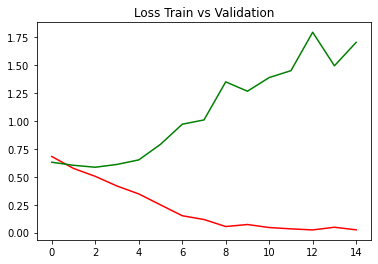

In [17]:
plt.plot(history.epoch, history.history["loss"], "r-", label="Training")
plt.plot(history.epoch, history.history["val_loss"], "g-", label="Validation")

plt.title("Loss Train vs Validation")

Text(0.5, 1.0, 'Accuracy Train vs Validation')

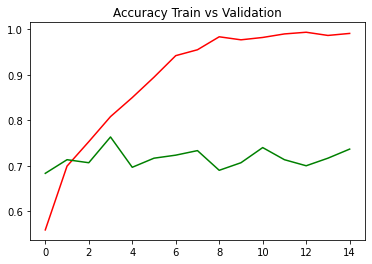

In [18]:
plt.plot(history.epoch, history.history["accuracy"], color="r")
plt.plot(history.epoch, history.history["val_accuracy"], color="g")

plt.title("Accuracy Train vs Validation")

## Image Augmentation

In [19]:
augmentation_args = {
    "rotation_range": 40,
    "width_shift_range": 0.2,
    "height_shift_range": 0.2,
    "shear_range": 0.2,
    "zoom_range": 0.2,
    "horizontal_flip": True,
    "fill_mode": "nearest",
}

In [23]:
train_data_gen = ImageDataGenerator(rescale=1.0 / 255, **augmentation_args)

train_generator = train_data_gen.flow_from_directory(
    TRAIN_DATASET_PATH,
    batch_size=BATCH_SIZE,
    target_size=(TARGET_IMG_SIZE, TARGET_IMG_SIZE),
    class_mode="binary",
)

validation_data_gen = ImageDataGenerator(rescale=1.0 / 255, **augmentation_args)

validation_generator = validation_data_gen.flow_from_directory(
    VALIDATION_DATASET_PATH,
    batch_size=BATCH_SIZE,
    target_size=(TARGET_IMG_SIZE, TARGET_IMG_SIZE),
    class_mode="binary",
)

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [22]:
augemented_model = create_conv_model()

In [24]:
history_augmented = augemented_model.fit(
    train_generator, epochs=15, validation_data=validation_generator
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 85 steps, validate for 10 steps
Epoch 1/15
85/85 [==============================] - 24s 281ms/step - loss: 0.6895 - accuracy: 0.5419 - val_loss: 0.7443 - val_accuracy: 0.5000
Epoch 2/15
85/85 [==============================] - 26s 304ms/step - loss: 0.6768 - accuracy: 0.5570 - val_loss: 0.6884 - val_accuracy: 0.5967
Epoch 3/15
85/85 [==============================] - 26s 304ms/step - loss: 0.6574 - accuracy: 0.5822 - val_loss: 0.6958 - val_accuracy: 0.5867
Epoch 4/15
85/85 [==============================] - 27s 318ms/step - loss: 0.6374 - accuracy: 0.6222 - val_loss: 0.6761 - val_accuracy: 0.6100
Epoch 5/15
85/85 [==============================] - 27s 318ms/step - loss: 0.6310 - accuracy: 0.6215 - val_loss: 0.6779 - val_accuracy: 0.6700
Epoch 6/15
85/85 [==============================] - 27s 317ms/step - loss: 0.6375 - accuracy: 0.6296 - val_loss: 0.6663 - val_accuracy: 0.5667
Epoch 7/15
85/85 [==============================] 

Text(0.5, 1.0, 'Loss Train vs Validation')

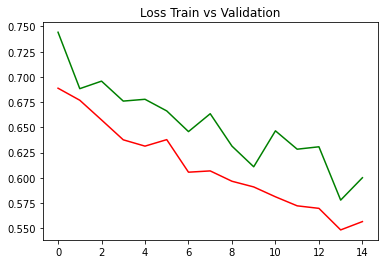

In [25]:
plt.plot(
    history_augmented.epoch, history_augmented.history["loss"], "r-", label="Training"
)
plt.plot(
    history_augmented.epoch,
    history_augmented.history["val_loss"],
    "g-",
    label="Validation",
)

plt.title("Loss Train vs Validation")

Text(0.5, 1.0, 'Accuracy Train vs Validation')

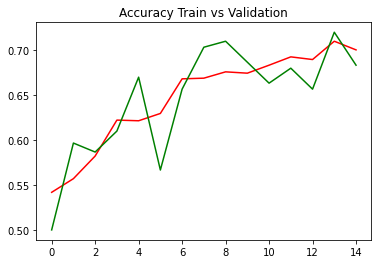

In [30]:
plt.plot(history_augmented.epoch, history_augmented.history["accuracy"], color="r")
plt.plot(history_augmented.epoch, history_augmented.history["val_accuracy"], color="g")

plt.title("Accuracy Train vs Validation")